#**Assignment1**
**Subject: Data Mining**


1. You need to download ‘breast cancer wisconsin’ data using the library Scikit learn; ref is given
below. [2]
2. Remove the missing/infinite values using the mean strategy if required. [3]
3. Visualize the data in 2-D scatter plot and write the inferences, How the data look like. [5]
4. Make a boxplot for each feature and highlight the outlier, if any, then remove the outlier, make
again box plot to show the outlier effect and write the inferences. [5]
5. Normalized the data if required, and write a note for what, why and how you performed normalization.[5]

**Ref:**
1. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn
.datasets.load_breast_cancer

**Importing Packages and Loading Data**

In [ ]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import seaborn as sns # Statistical data visualization
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import numpy as np # Import Numpy for data statistical analysis 
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.model_selection import train_test_split,ShuffleSplit
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain

In [ ]:
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

# **Import Dataset**

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
# Create an object of the dataset
cancer = load_breast_cancer()

In [ ]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
# Find keys
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(cancer['target_names'])

['malignant' 'benign']


In [ ]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
cancer['data'].shape

(569, 30)

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
df = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [ ]:
df.head()

mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890     0.0
1        20.57         17.77  ...                  0.08902     0.0
2        19.69         21.25  ...                  0.08758     0.0
3        11.42         20.38  ...                  0.17300     0.0
4        20.29         14.34  ...                  0.07678     0.0

[5 rows x 31 columns]

In [ ]:
df.tail()

mean radius  mean texture  ...  worst fractal dimension  target
564        21.56         22.39  ...                  0.07115     0.0
565        20.13         28.25  ...                  0.06637     0.0
566        16.60         28.08  ...                  0.07820     0.0
567        20.60         29.33  ...                  0.12400     0.0
568         7.76         24.54  ...                  0.07039     1.0

[5 rows x 31 columns]

In [ ]:
df.describe()

mean radius  mean texture  ...  worst fractal dimension      target
count   569.000000    569.000000  ...               569.000000  569.000000
mean     14.127292     19.289649  ...                 0.083946    0.627417
std       3.524049      4.301036  ...                 0.018061    0.483918
min       6.981000      9.710000  ...                 0.055040    0.000000
25%      11.700000     16.170000  ...                 0.071460    0.000000
50%      13.370000     18.840000  ...                 0.080040    1.000000
75%      15.780000     21.800000  ...                 0.092080    1.000000
max      28.110000     39.280000  ...                 0.207500    1.000000

[8 rows x 31 columns]

In [ ]:
# Quick glimpse of tumor features (mean values) in relation to target
df.groupby('target').mean()

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
target                             ...                                         
0.0       17.462830     21.604906  ...        0.323468                 0.091530
1.0       12.146524     17.914762  ...        0.270246                 0.079442

[2 rows x 30 columns]

In [ ]:
# For visual comparisons of differential diagnosis...
# create to dataframes - one for benign, one for malignant tumor data

df_n = df[df['target'] == 0]
df_y = df[df['target'] == 1]

# Create list of features related to mean tumor characteristics
features_means =list(df.columns[0:10])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
#for counting the duplicate elements we sum all the rows
sum(df.duplicated())

0

#**Exploratory Data Analysis (EDA)**

In [ ]:
outcome_count = df.target.value_counts()
outcome_count = pd.Series(outcome_count)
outcome_count = pd.DataFrame(outcome_count)
outcome_count.index = ['Benign', 'Malignant']

outcome_count['Percent'] = 100*outcome_count['target']/sum(outcome_count['target'])
outcome_count['Percent'] = outcome_count['Percent'].round().astype('int')

print('The Perecentage of tumors classified as \'malignant\' in this data set is: {}'.format(100*float(df.target.value_counts()[1])/float((len(df)))))
print('\nA good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy')
outcome_count

The Perecentage of tumors classified as 'malignant' in this data set is: 62.74165202108963

A good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy


target  Percent
Benign        357       63
Malignant     212       37

  **Ploting all the scatter matrix pairs in a single plot**

Text(0.5, 0.98, 'Scatter matrix of target and model features')

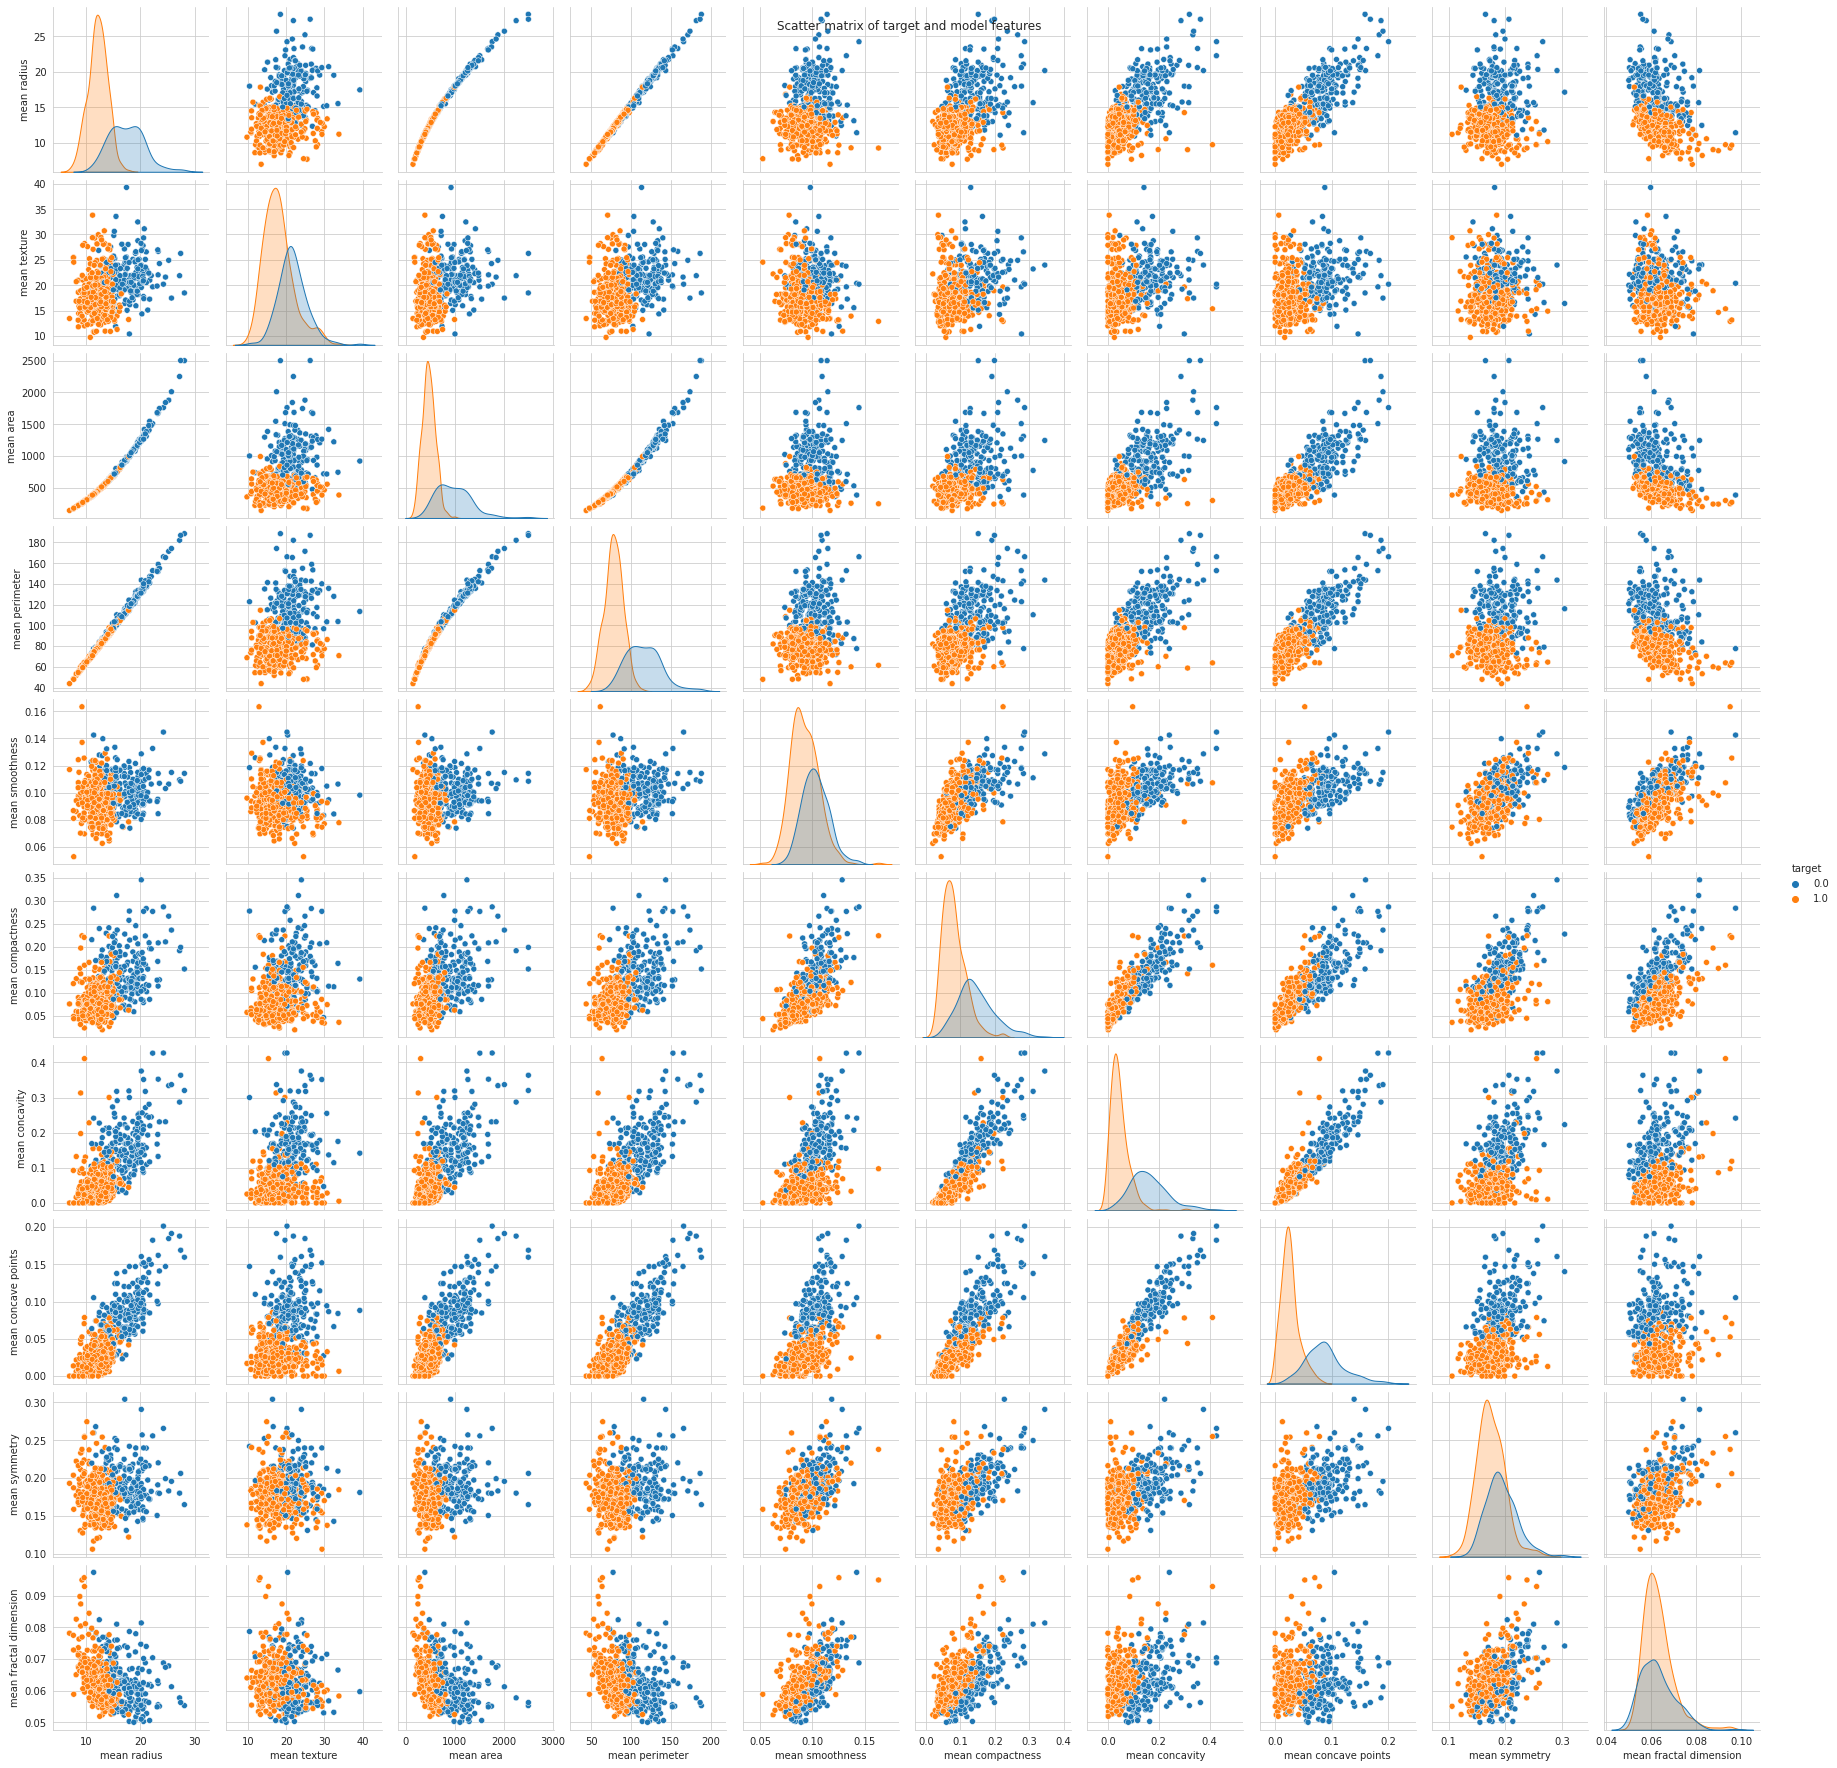

In [ ]:
#Visualize the data

sns.pairplot(df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness','mean compactness',	'mean concavity',	'mean concave points',	'mean symmetry',	'mean fractal dimension'] )
plt.suptitle('Scatter matrix of target and model features')

Text(0.5, 0.98, 'Scatter matrix of target and model features')

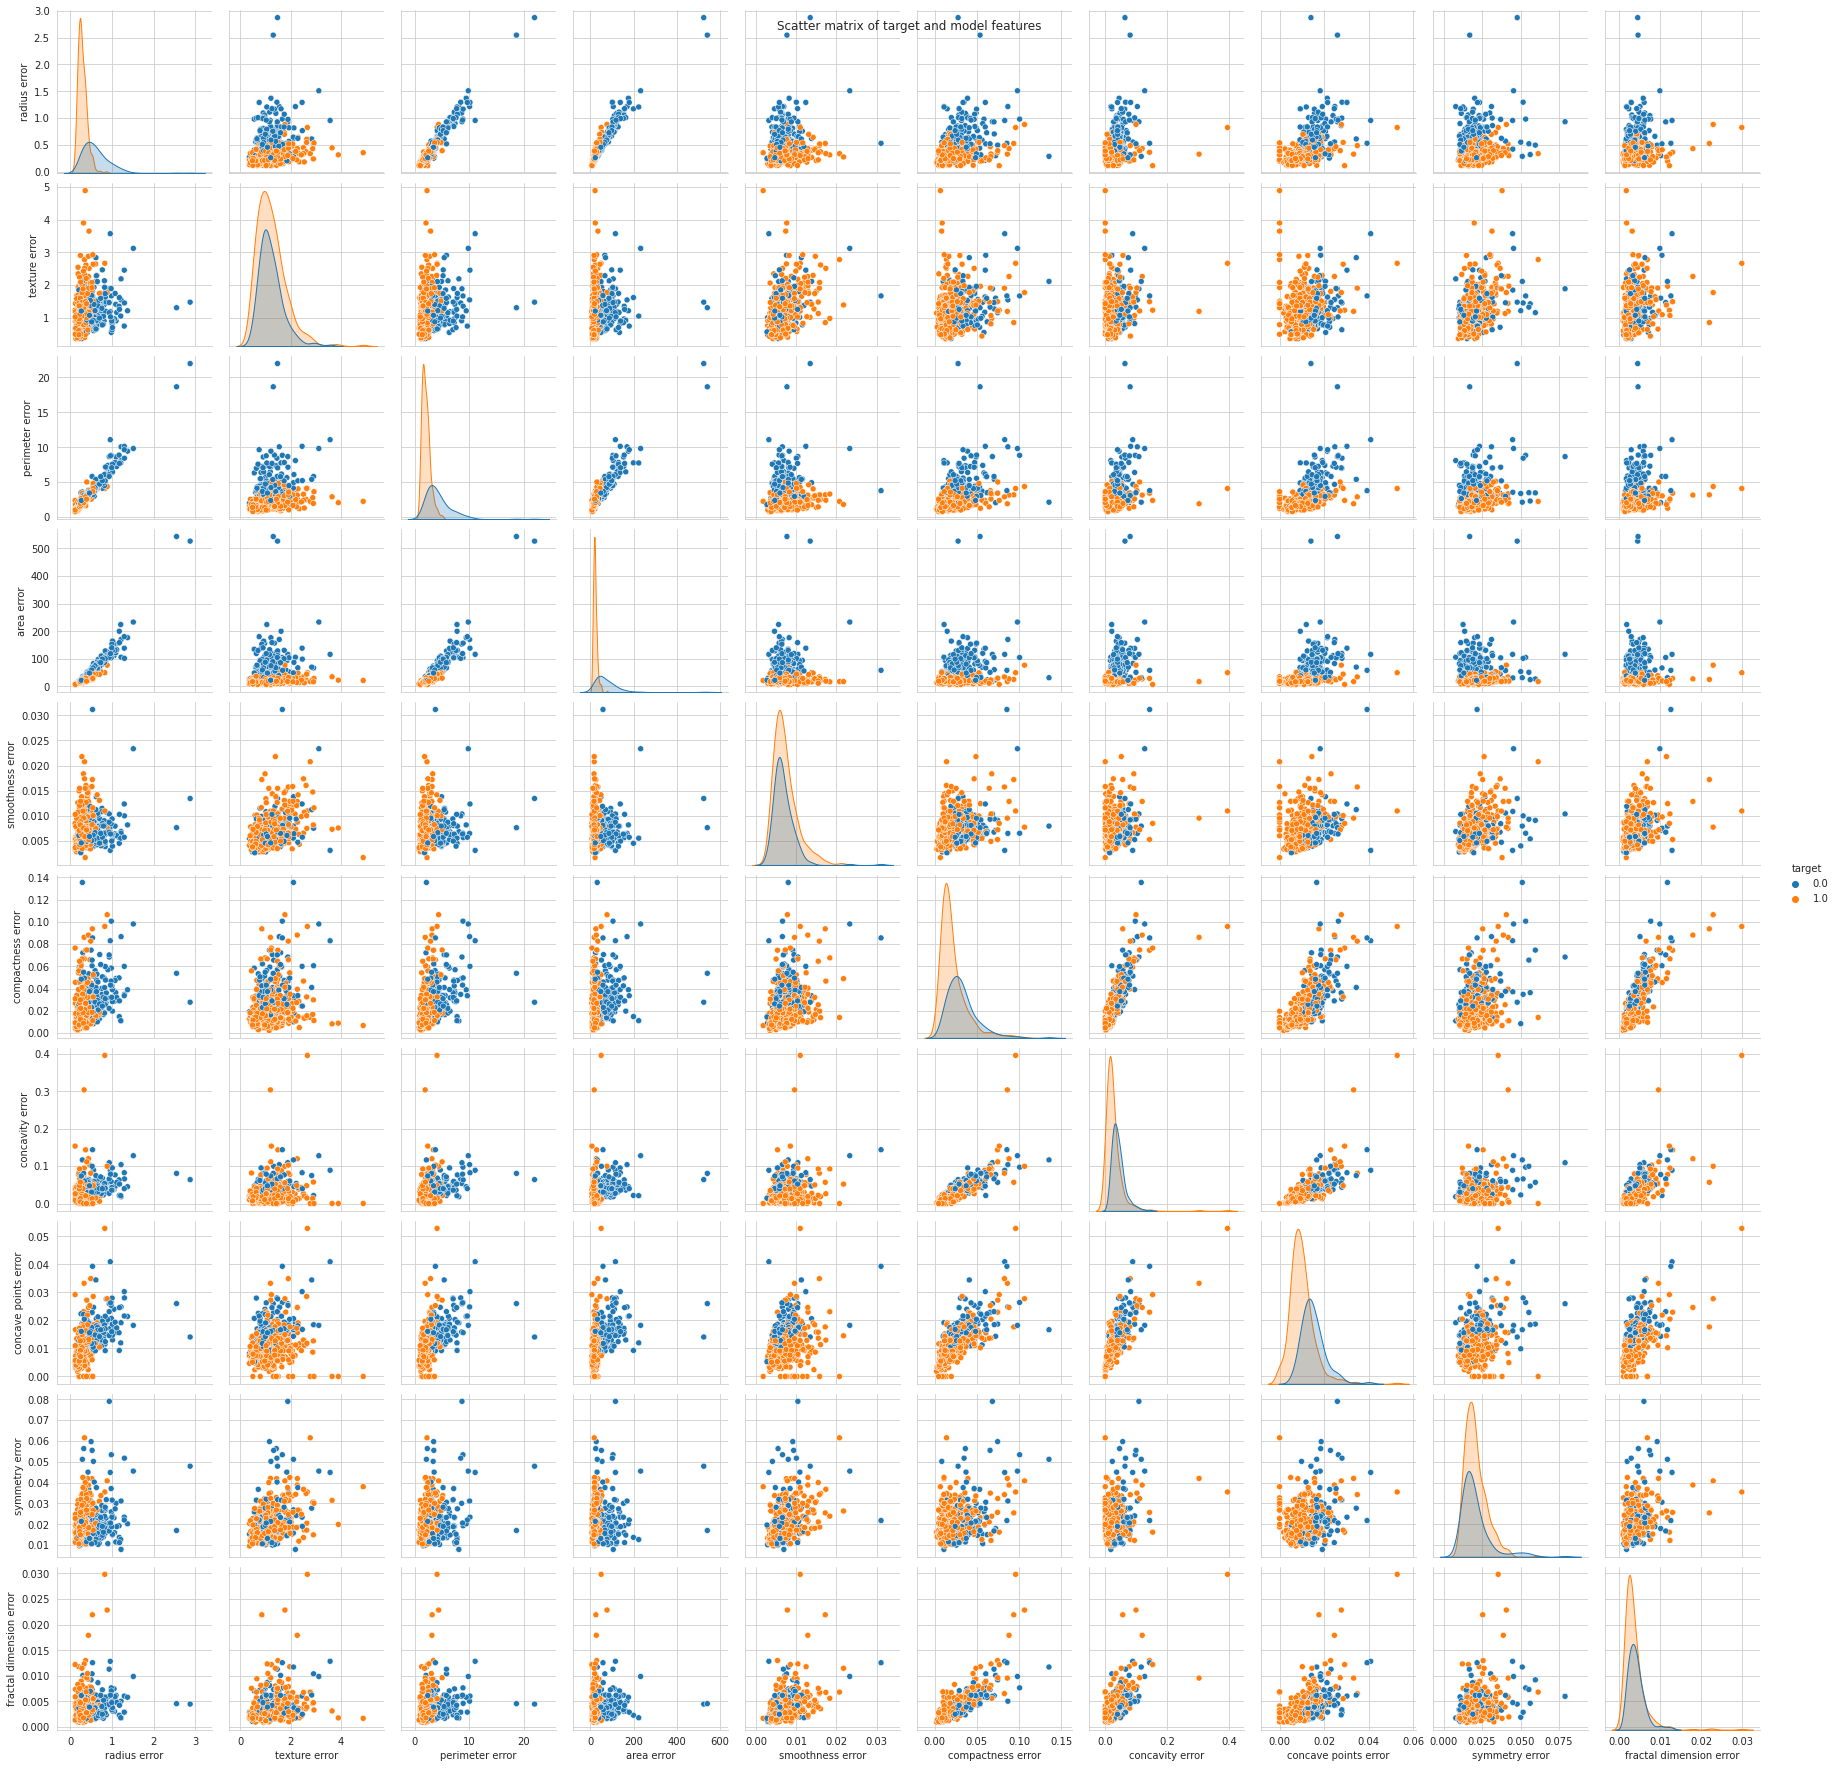

In [ ]:
sns.pairplot(df, hue = 'target', vars = ['radius error',	'texture error',	'perimeter error',	'area error',	'smoothness error',	'compactness error',	'concavity error',	'concave points error',	'symmetry error',	'fractal dimension error'] )
plt.suptitle('Scatter matrix of target and model features')

Text(0.5, 0.98, 'Scatter matrix of target and model features')

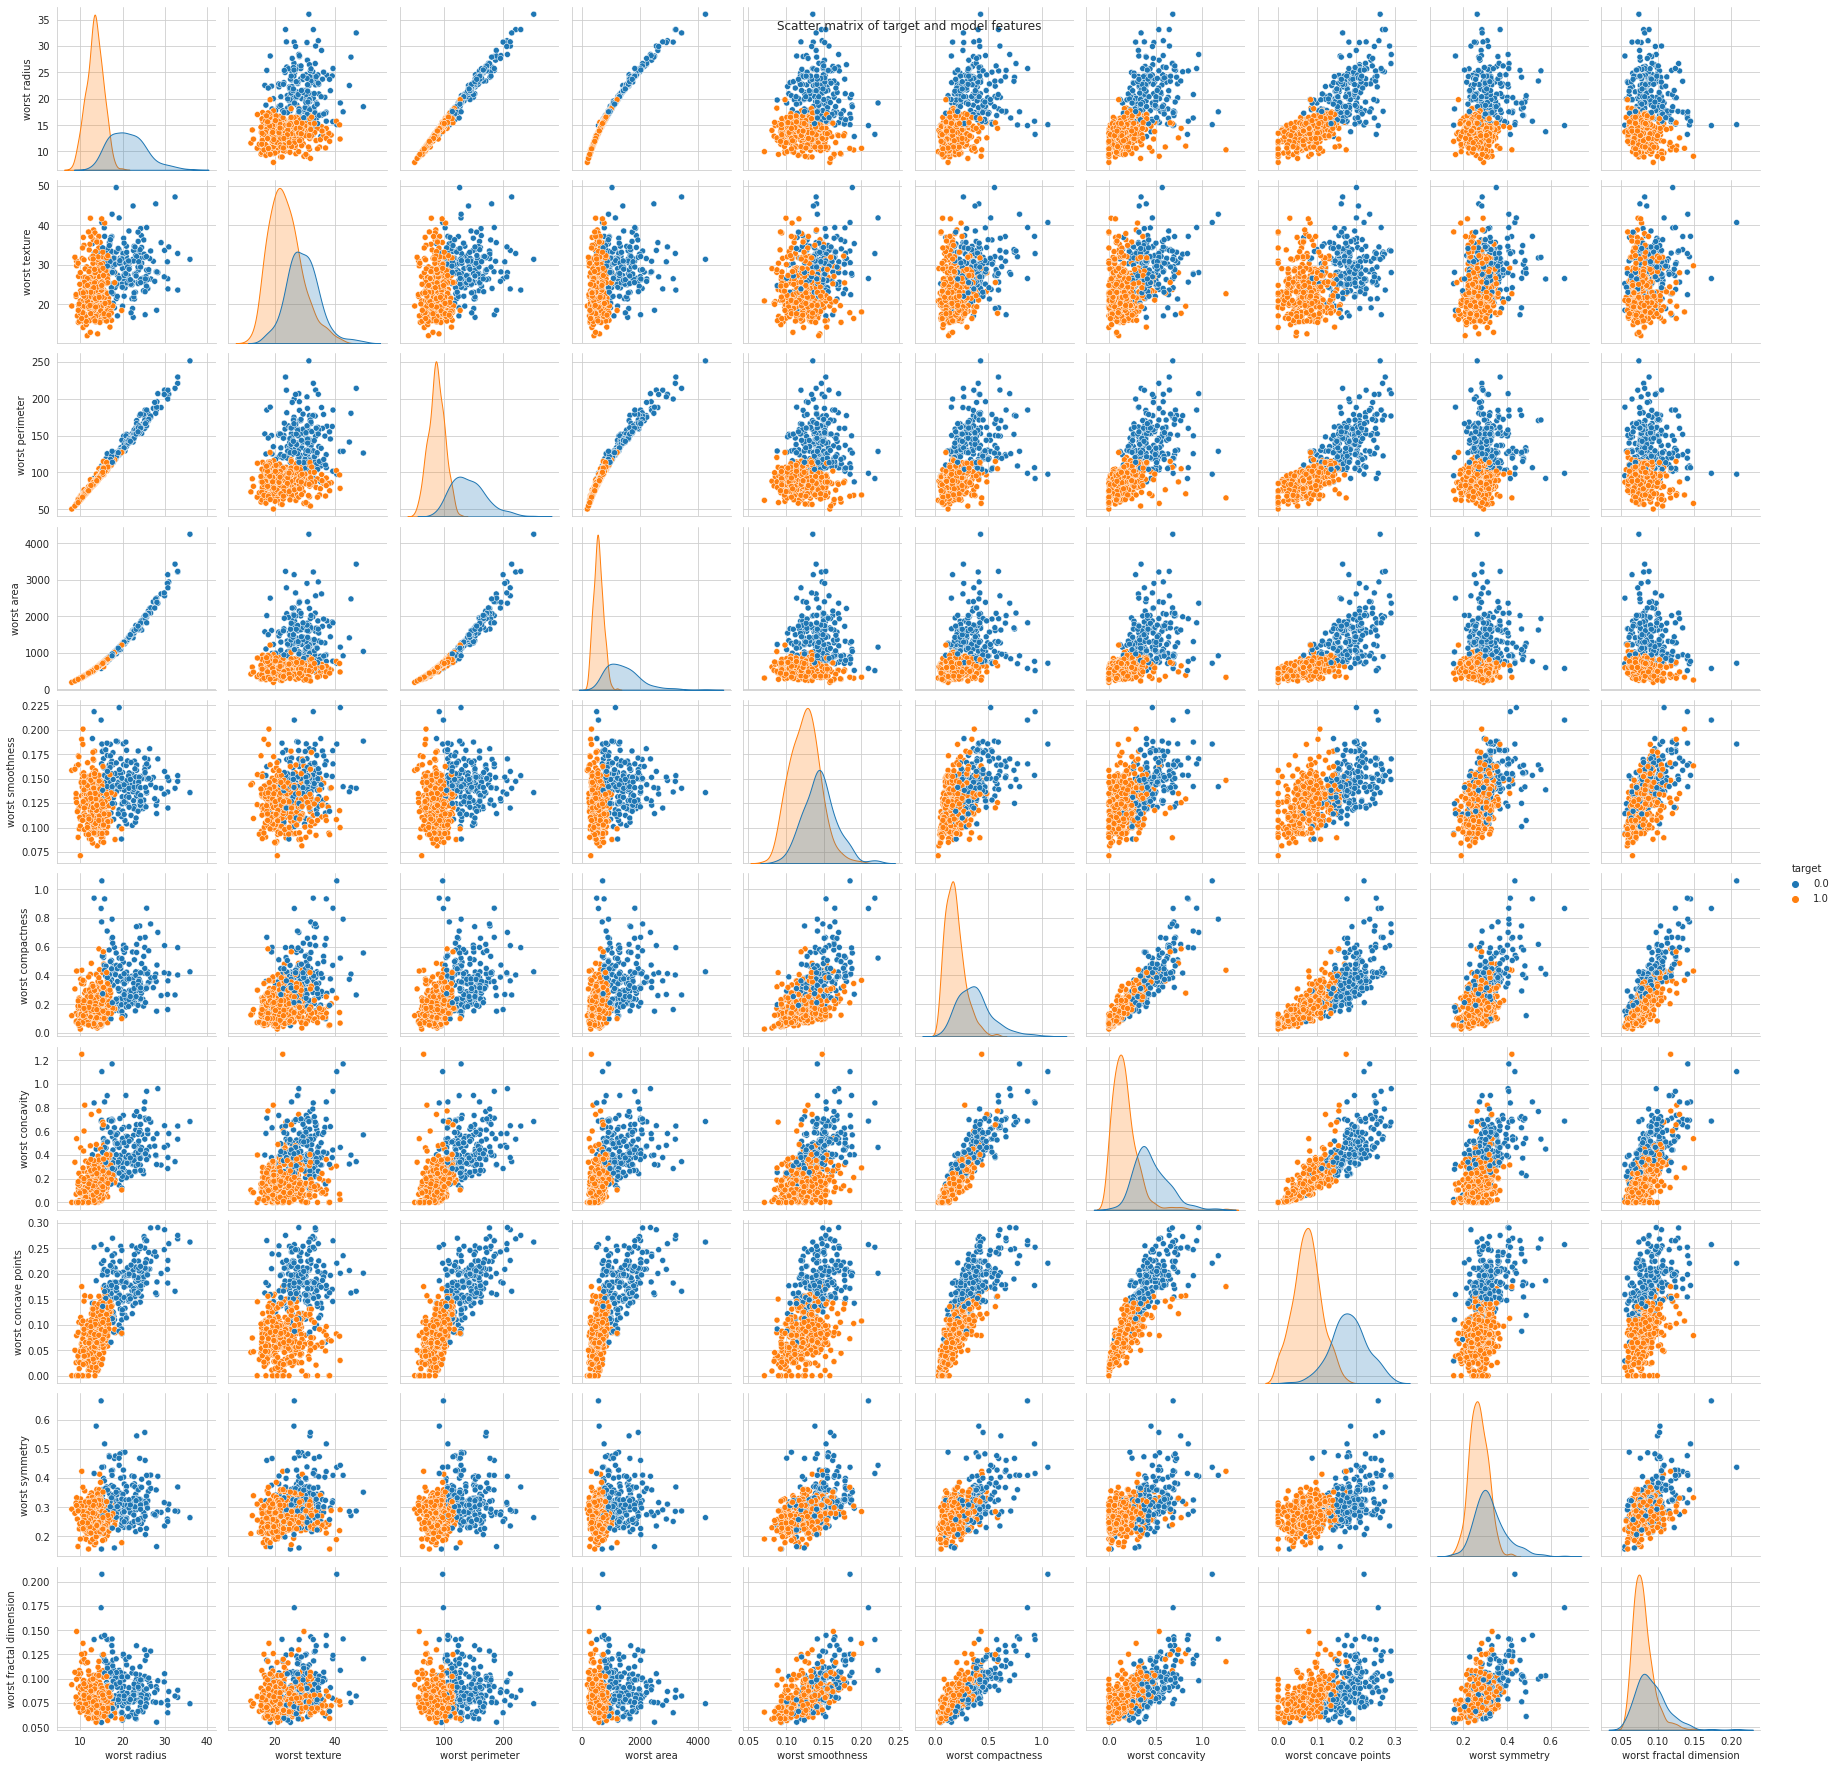

In [ ]:
sns.pairplot(df, hue = 'target', vars = ['worst radius',	'worst texture',	'worst perimeter',	'worst area',	'worst smoothness',	'worst compactness',	'worst concavity',	'worst concave points',	'worst symmetry',	'worst fractal dimension'] )
plt.suptitle('Scatter matrix of target and model features')

Here, **0.0** referes to benign which means the cells are safe from cancer whereas **1.0** refers to Malign which means the cell is very much dangerous and venomous can lead to breast cancer

**Analysis:** The scatter matrix helps to understand the pairwise relationships between the features. Note that the orange dots represent negative targets and the blue dots represent positive targets. The diagonal contains a histogram plot per feature.

**Positively Correlated Features**

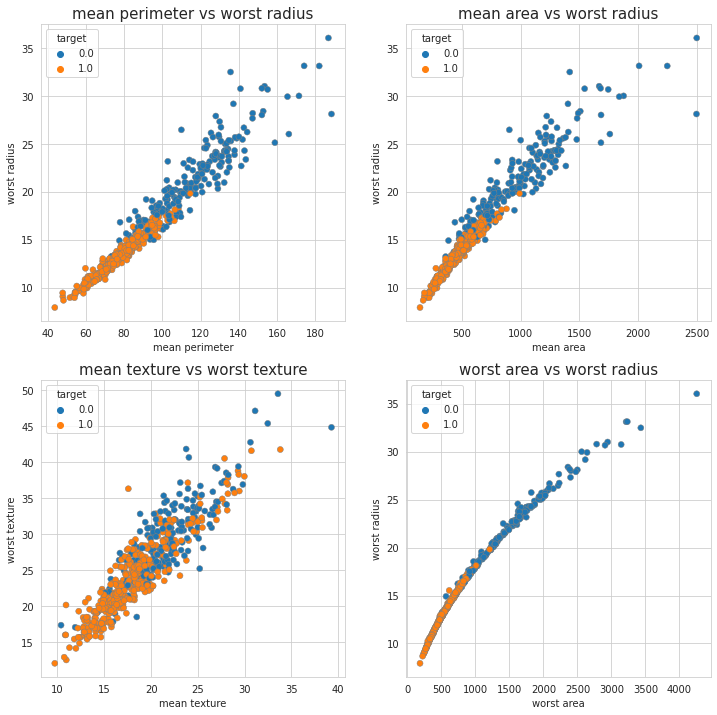

In [ ]:
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.color_palette("bright")
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "target",
                    data = df, edgecolor=edgecolor)
    plt.title(a + ' vs ' + b,fontsize=15)
    k+=1

    
plot_scatter('mean perimeter','worst radius',221)   
plot_scatter('mean area','worst radius',222)   
plot_scatter('mean texture','worst texture',223)   
plot_scatter('worst area','worst radius',224)

**Un-Correlated Features**

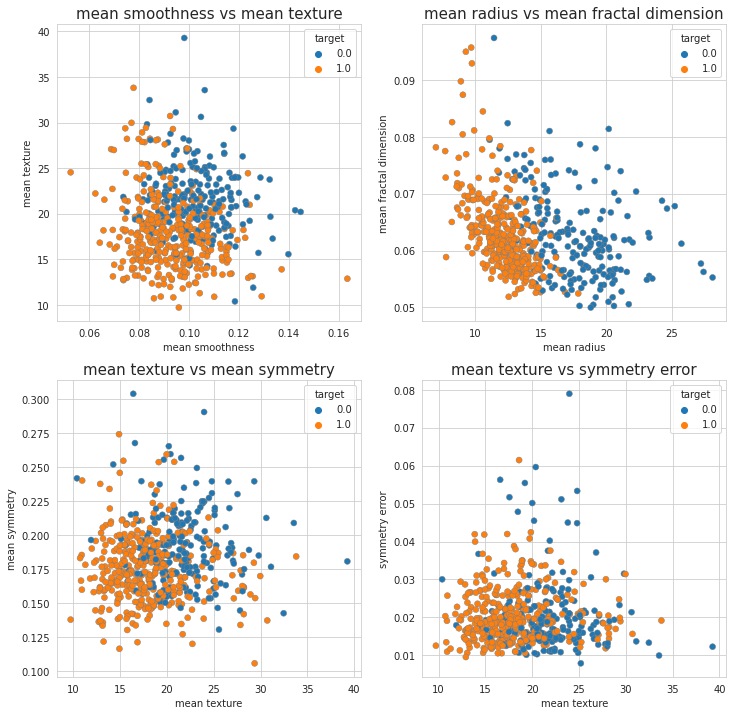

In [ ]:
fig = plt.figure(figsize=(12,12))
plot_scatter('mean smoothness','mean texture',221)
plot_scatter('mean radius','mean fractal dimension',222)
plot_scatter('mean texture','mean symmetry',223)
plot_scatter('mean texture','symmetry error',224)

**Negatively Correlated Features**

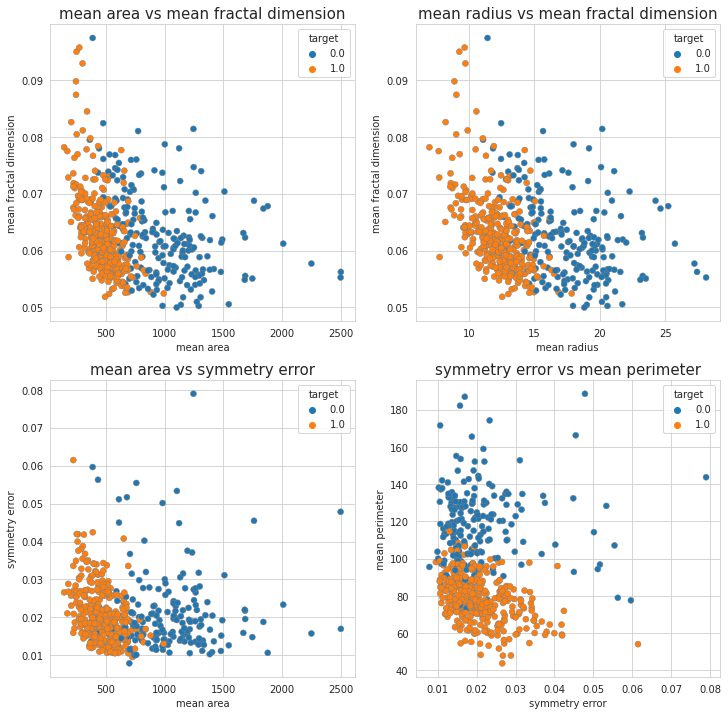

In [ ]:
fig = plt.figure(figsize=(12,12))
plot_scatter('mean area','mean fractal dimension',221)
plot_scatter('mean radius','mean fractal dimension',222)
plot_scatter('mean area','symmetry error',223)
plot_scatter('symmetry error','mean perimeter',224)

**Relationship Between Features**

* Scatter Plot: Simplest way to check relationship between two variables
* We are looking at relationship between radius mean and area mean. In scatter plot you can see that when radius mean increases, area mean also increases. Therefore, they are positively correlated with each other.
* There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean

**Statistical Analysis(Outliers Detection)**

* While looking histogram as yok can see there are rare values in bening distribution 
* There values can be errors or rare events.
* These errors and rare events can be called outliers.

#**Box Plot**

No handles with labels found to put in legend.


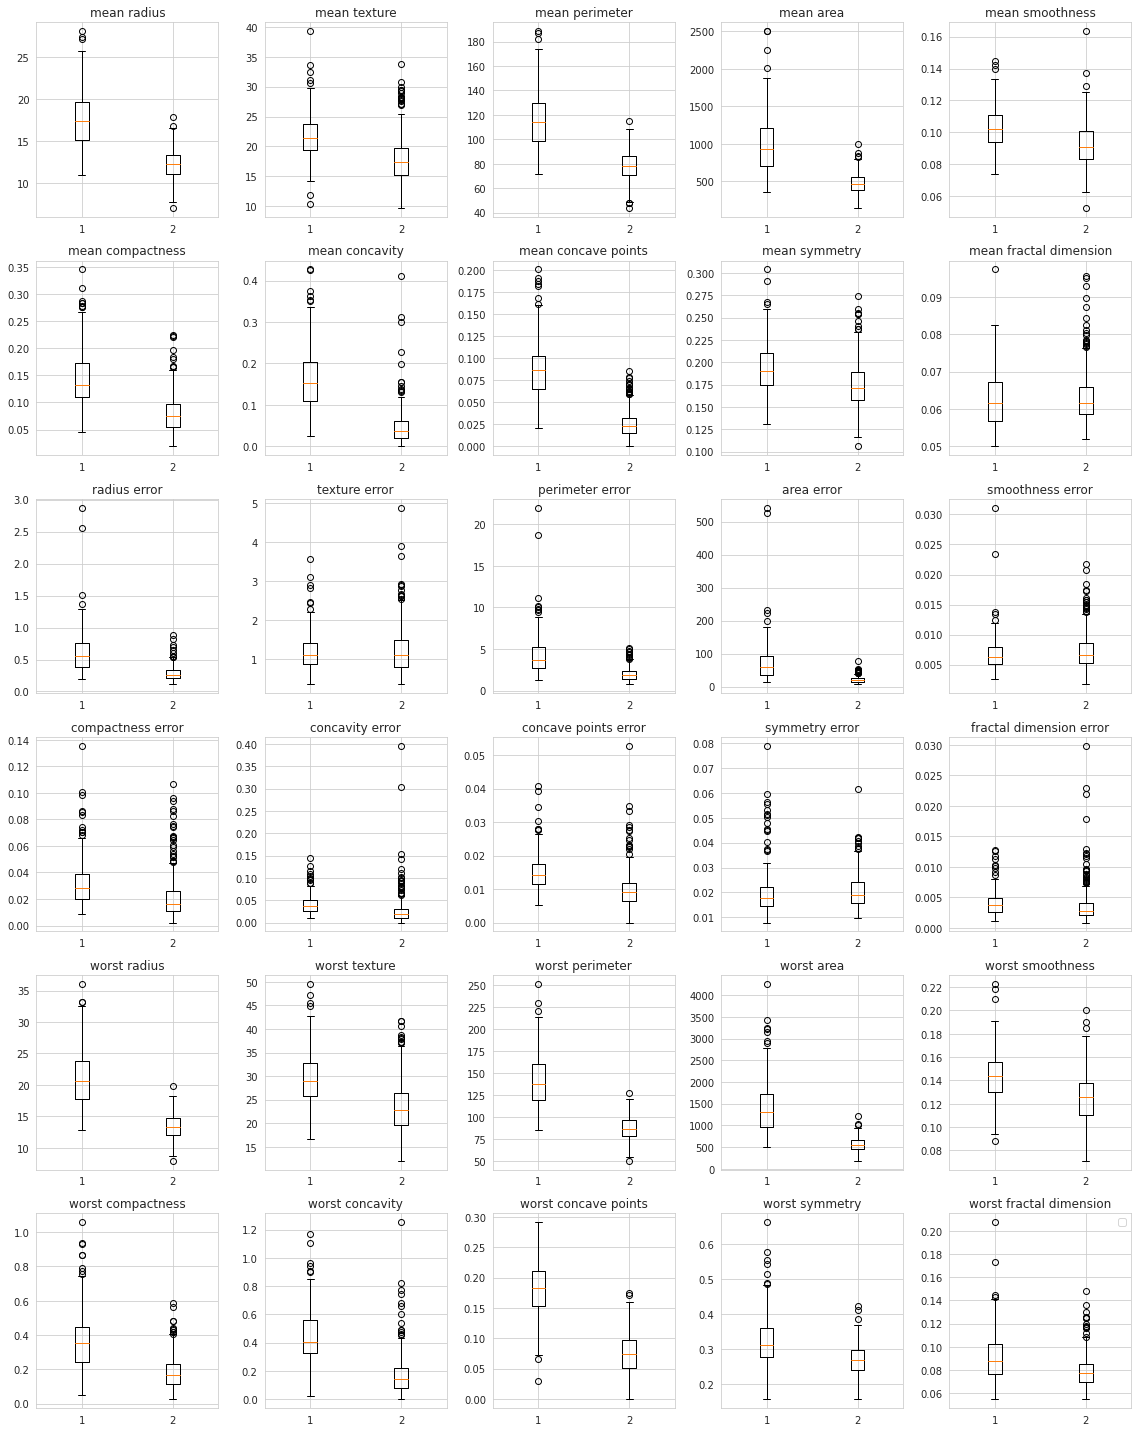

In [ ]:
fig = plt.figure(figsize=(16,20))

# Create 'for loop' to enerate though tumor features and compare
for i,b in enumerate(list(df.columns[0:30])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(6,5,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.boxplot([df_n[b], df_y[b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

**Calculating outliers:**

1. We calculate first quartile (Q1)(25%)
2. then we find IQR(inter quartile range) = Q3-Q1
3. finally compute Q1 - 1.5IQR and Q3 + 1.5IQR
4. Anything outside this range is an outlier

#**Remove Outliers Using IQR**

In [ ]:
from collections import Counter

def detect_outliers(train_data,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
list_atributes = df.drop('target',axis=1).columns
Outliers_to_drop = detect_outliers(df,2,list_atributes)

In [ ]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [ ]:
df.shape

(486, 31)

No handles with labels found to put in legend.


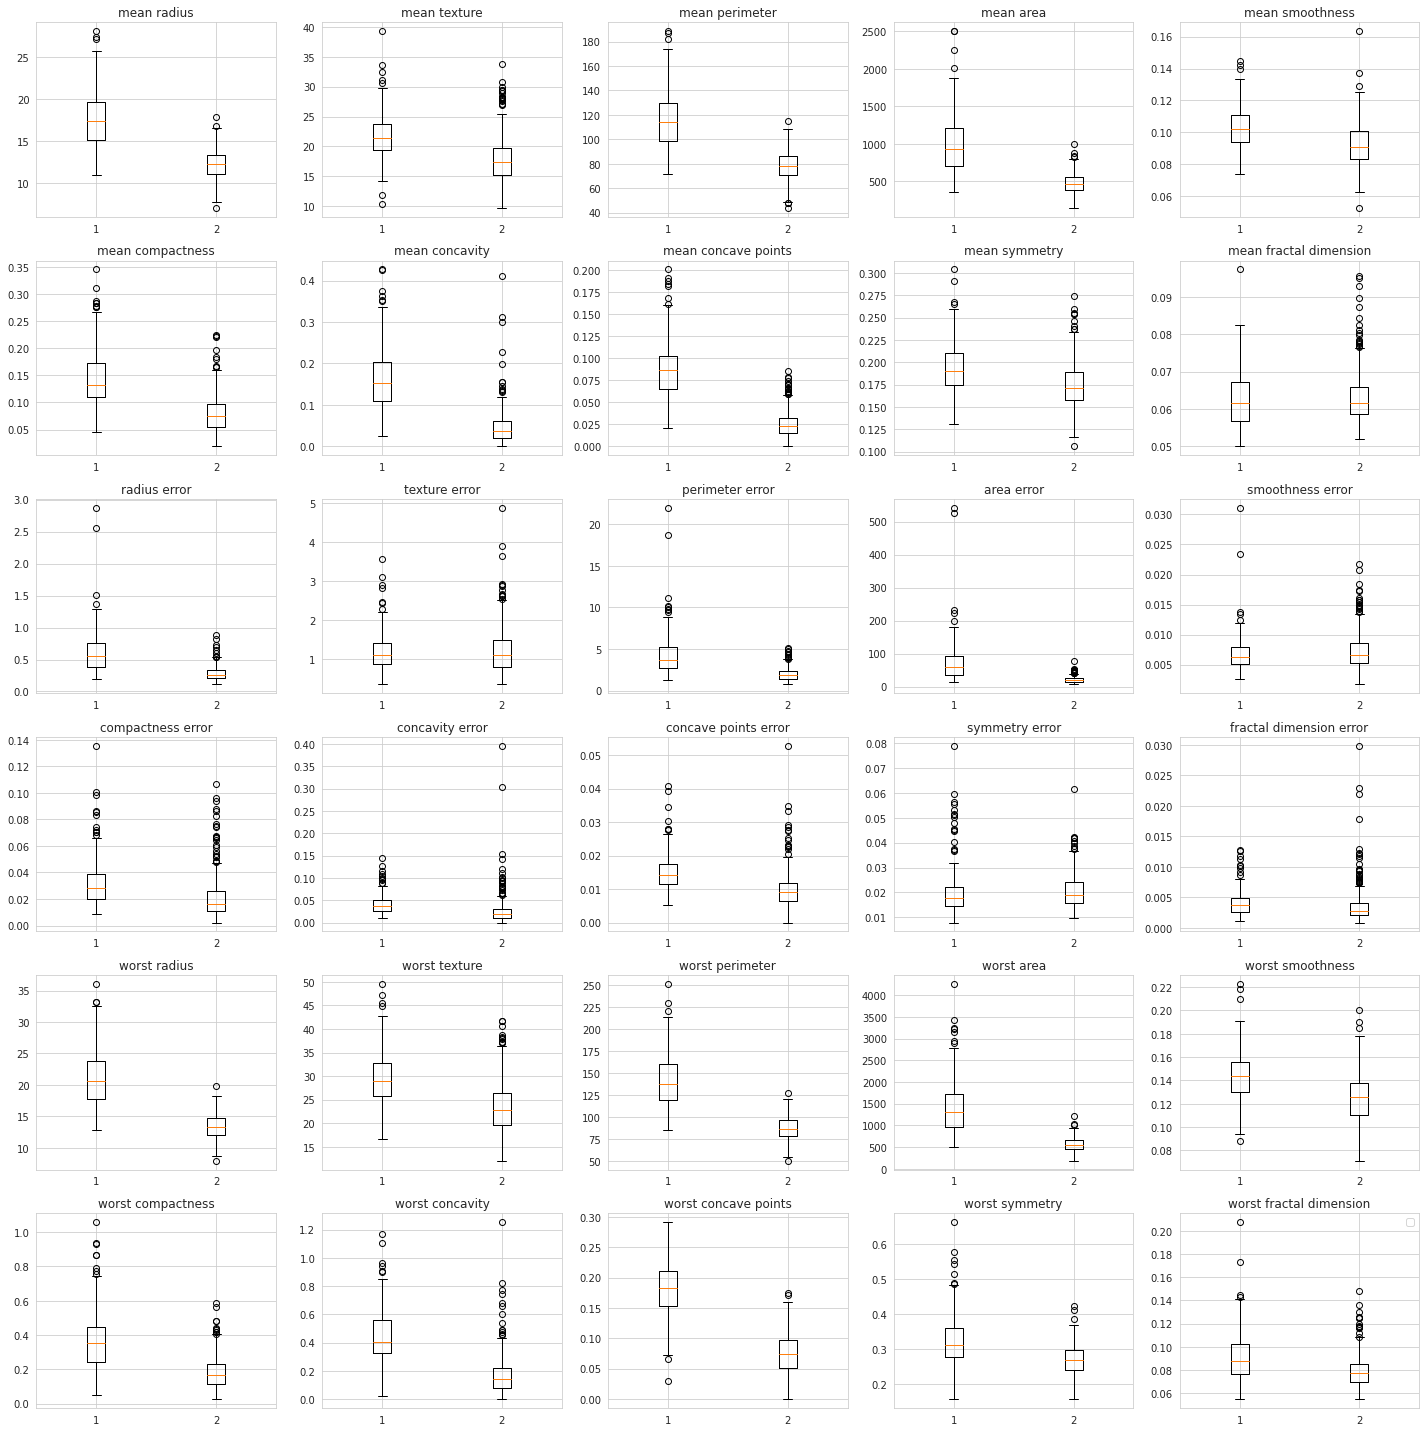

In [ ]:
fig = plt.figure(figsize=(20,20))

# Create 'for loop' to enerate though tumor features and compare
for i,b in enumerate(list(df.columns[0:30])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(6,5,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.boxplot([df_n[b], df_y[b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

After removing outlier via IQR method, we see that still few outliers remains. We are not removing outliers 100% as doing so will reduce the data to a large extent. So we remove outlier only once instead of few iterations

In [ ]:
y = df.target.values#
X = df.drop(['target'],axis=1)

In [ ]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1.

#**Normalization**

To normalize our data, we can apply the min-max scaling to each feature column, where the new value xnorm can be computed as below

Xnorm = (X - Xmin)/(Xmax -Xmin)

In [ ]:
X = (X - np.min(X))/(np.max(X)-np.min(X)).values

In [ ]:
X.head(10)

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0     0.944402      0.272574  ...        0.357057                 0.396412
1     0.883244      0.390260  ...        0.617310                 0.379529
2     0.924943      0.156578  ...        0.240651                 0.252902
3     0.380082      0.202570  ...        0.729493                 0.811232
4     0.783168      0.347311  ...        0.451448                 0.333802
5     0.467649      0.376057  ...        0.491556                 0.702193
6     0.418306      0.409537  ...        0.848010                 0.609567
7     0.628188      0.457558  ...        0.416767                 0.343651
8     0.611509      0.276632  ...        0.671291                 0.581428
9     0.616374      0.481569  ...        0.374849                 0.089811

[10 rows x 30 columns]

Though normalization is useful to keep values in a bounded interval, standardization can be more practical when we want the feature columns to have a normal distribution.